<a href="https://colab.research.google.com/github/Jaomiew/Multivariate/blob/main/exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.decomposition import PCA

In [4]:
m = pd.read_csv('Pizza.csv')
m

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


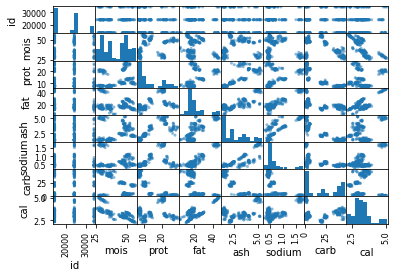

In [6]:
pd.plotting.scatter_matrix(m);

In [7]:
m_matrix = np.array(exam.iloc[:,-7:])
m_matrix

array([[27.82, 21.43, 44.87, ...,  1.77,  0.77,  4.93],
       [28.49, 21.26, 43.89, ...,  1.79,  1.02,  4.84],
       [28.35, 19.99, 45.78, ...,  1.63,  0.8 ,  4.95],
       ...,
       [44.55, 11.01, 16.03, ...,  0.64, 25.98,  2.92],
       [47.6 , 10.43, 15.18, ...,  0.56, 24.47,  2.76],
       [46.84,  9.91, 15.5 , ...,  0.57, 25.48,  2.81]])

In [8]:
m_matrix = m_matrix.T
print(m_matrix.shape)
m_matrix

(7, 300)


array([[27.82, 28.49, 28.35, ..., 44.55, 47.6 , 46.84],
       [21.43, 21.26, 19.99, ..., 11.01, 10.43,  9.91],
       [44.87, 43.89, 45.78, ..., 16.03, 15.18, 15.5 ],
       ...,
       [ 1.77,  1.79,  1.63, ...,  0.64,  0.56,  0.57],
       [ 0.77,  1.02,  0.8 , ..., 25.98, 24.47, 25.48],
       [ 4.93,  4.84,  4.95, ...,  2.92,  2.76,  2.81]])

### **ปรับ std และ mean**

**โดย std = 1 และ mean = 0**

In [9]:
# ใช้วิธีแบบเร็วเพื่องานต่อการคำนวน
m_matrix_m0_std1 = stats.zscore(m_matrix,axis=1)
m_matrix_m0_std1

array([[-1.37181459, -1.30156227, -1.31624186, ...,  0.3823963 ,
         0.70220164,  0.62251244],
       [ 1.25418127,  1.22771661,  1.03000998, ..., -0.36794707,
        -0.45823828, -0.53918903],
       [ 2.74984143,  2.64047481,  2.85139615, ..., -0.46866201,
        -0.56352082, -0.52780927],
       ...,
       [ 2.97668662,  3.03077869,  2.59804213, ..., -0.07951534,
        -0.29588362, -0.26883759],
       [-1.22751105, -1.21362189, -1.22584435, ...,  0.1730719 ,
         0.08918137,  0.14529358],
       [ 2.68012924,  2.53473344,  2.71243942, ..., -0.56704362,
        -0.82552504, -0.7447496 ]])

In [12]:
np.mean(m_matrix_m0_std1,axis=1) 
# เช็คค่า mean

array([-1.18423789e-16,  1.89478063e-16, -2.36847579e-16, -5.21064673e-16,
       -2.36847579e-16, -4.73695157e-17,  1.89478063e-16])

In [11]:
np.std(m_matrix_m0_std1,axis=1)
# เช็คค่า std

array([1., 1., 1., 1., 1., 1., 1.])

(array([ 8., 46., 29., 10., 38., 13.,  5.,  1., 11., 47., 35., 22., 25.,
        10.]),
 array([-1.66750345, -1.42618899, -1.18487452, -0.94356005, -0.70224558,
        -0.46093111, -0.21961664,  0.02169783,  0.2630123 ,  0.50432677,
         0.74564124,  0.98695571,  1.22827018,  1.46958465,  1.71089912]),
 <a list of 14 Patch objects>)

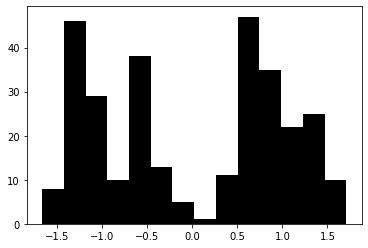

In [13]:
plt.hist(m_matrix_m0_std1[0,:],bins = 'rice', color = 'k')

(array([ 8., 46., 29., 10., 38., 13.,  5.,  1., 11., 47., 35., 22., 25.,
        10.]),
 array([-1.66750345, -1.42618899, -1.18487452, -0.94356005, -0.70224558,
        -0.46093111, -0.21961664,  0.02169783,  0.2630123 ,  0.50432677,
         0.74564124,  0.98695571,  1.22827018,  1.46958465,  1.71089912]),
 <a list of 14 Patch objects>)

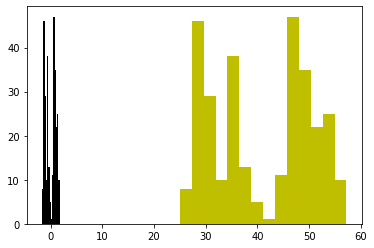

In [15]:
plt.hist(m_matrix[0,:],bins = 'rice', color = 'y') 
plt.hist(m_matrix_m0_std1[0,:],bins = 'rice', color = 'k')

### **หาค่า cov matrix ของ data**

In [16]:
m_cov = np.cov(m_matrix_m0_std1)
m_cov

array([[ 1.00334448,  0.36145252, -0.17189118,  0.26644367, -0.10262097,
        -0.59378092, -0.7669972 ],
       [ 0.36145252,  1.00334448,  0.49966723,  0.82659903,  0.43056473,
        -0.85639691,  0.07049308],
       [-0.17189118,  0.49966723,  1.00334448,  0.79428157,  0.93644671,
        -0.64237943,  0.76712418],
       [ 0.26644367,  0.82659903,  0.79428157,  1.00334448,  0.8108249 ,
        -0.90199502,  0.32756032],
       [-0.10262097,  0.43056473,  0.93644671,  0.8108249 ,  1.00334448,
        -0.6222505 ,  0.67420485],
       [-0.59378092, -0.85639691, -0.64237943, -0.90199502, -0.6222505 ,
         1.00334448, -0.02356313],
       [-0.7669972 ,  0.07049308,  0.76712418,  0.32756032,  0.67420485,
        -0.02356313,  1.00334448]])

### **eigen value และ eigen vector**

In [17]:
eigen_values, eigen_vectors = np.linalg.eig(m_cov)

In [18]:
eigen_values

array([4.18573434e+00, 2.29811778e+00, 4.15948838e-01, 9.54925358e-02,
       2.77695834e-02, 3.38738483e-04, 9.55061572e-06])

In [19]:
eigen_vectors

array([[ 6.47093729e-02,  6.28275866e-01, -4.21668945e-01,
        -2.20721584e-01,  6.47029345e-03, -4.46449902e-01,
        -4.18569035e-01],
       [ 3.78760904e-01,  2.69706650e-01,  7.46027442e-01,
        -1.05931982e-02,  3.87982788e-01,  1.71520299e-04,
        -2.76764643e-01],
       [ 4.46665915e-01, -2.34379085e-01, -1.99308714e-01,
        -5.07042158e-01, -1.73367634e-01,  5.25402868e-01,
        -3.77671525e-01],
       [ 4.71889526e-01,  1.10990417e-01,  5.62726863e-02,
         5.52398549e-01, -6.70885701e-01, -5.88609281e-02,
        -5.60214003e-02],
       [ 4.35702887e-01, -2.01661652e-01, -4.55168874e-01,
         4.46276890e-01,  6.02614079e-01, -3.13098518e-03,
         5.24323817e-04],
       [-4.24913712e-01, -3.20312078e-01,  5.22365058e-02,
         3.34339481e-01, -7.43689883e-03,  5.08853525e-04,
        -7.76067911e-01],
       [ 2.44487304e-01, -5.67457559e-01,  1.13315588e-01,
        -2.79263154e-01, -7.80031747e-02, -7.21913853e-01,
        -1.2059809

### **eigen vector อธิบาย data ได้ดีแค่ไหน** 

In [20]:
sum(eigen_values)

7.0234113712374535

In [21]:
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
print(variance_explained)

[59.59688423344787, 32.720819826580865, 5.9223191753902285, 1.3596318186805307, 0.3953859725404401, 0.004822990783854994, 0.00013598257622030136]


In [22]:
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

[ 59.59688423  92.31770406  98.24002324  99.59965505  99.99504103
  99.99986402 100.        ]


In [23]:
selected_eigen_vectors = eigen_vectors[:,:2]
selected_eigen_vectors

array([[ 0.06470937,  0.62827587],
       [ 0.3787609 ,  0.26970665],
       [ 0.44666592, -0.23437908],
       [ 0.47188953,  0.11099042],
       [ 0.43570289, -0.20166165],
       [-0.42491371, -0.32031208],
       [ 0.2444873 , -0.56745756]])

**5. plot กราฟ ด้วย data ใหม่**

In [24]:
X = m_matrix_m0_std1
X.shape

(7, 300)

In [25]:
W = selected_eigen_vectors
W.shape

(7, 2)

In [26]:
X_pca = X.T.dot(W)
X_pca

array([[ 5.01034284, -2.67921532],
       [ 5.02375538, -2.52929455],
       [ 4.8054393 , -2.67370033],
       [ 4.4695434 , -2.28502923],
       [ 4.47189256, -2.1591524 ],
       [ 4.50479978, -2.16797296],
       [ 4.31535781, -2.05704328],
       [ 4.75785167, -2.35308587],
       [ 4.85461934, -2.68121904],
       [ 4.91640631, -2.65851314],
       [ 4.84099582, -2.73660839],
       [ 4.89136871, -2.74250173],
       [ 4.61075407, -2.57925365],
       [ 4.42153254, -2.29169853],
       [ 4.46677678, -2.13288492],
       [ 4.75343467, -2.46713643],
       [ 4.44513083, -1.82836512],
       [ 4.20201792, -1.80148331],
       [ 4.49687192, -1.88605015],
       [ 4.60756167, -2.2350726 ],
       [ 4.85726834, -2.96634356],
       [ 4.82265249, -2.78671232],
       [ 4.51834142, -2.16243103],
       [ 4.25395639, -2.12444278],
       [ 4.48975064, -2.0179968 ],
       [ 4.5415983 , -2.38008587],
       [ 4.63411775, -2.60980367],
       [ 4.46880183, -2.43393573],
       [ 4.75034835,

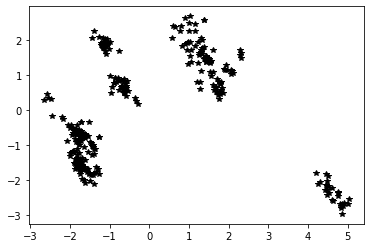

In [28]:
plt.plot(X_pca[:,0],X_pca[:,1],'*k')

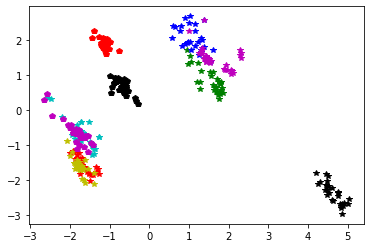

In [59]:
plt.plot(X_pca[:29,0],X_pca[:29,1],'*k')
plt.plot(X_pca[29:60,0],X_pca[29:60,1],'*g')
plt.plot(X_pca[60:87,0],X_pca[60:87,1],'*b')
plt.plot(X_pca[87:119,0],X_pca[87:119,1],'*m')
plt.plot(X_pca[119:147,0],X_pca[119:147,1],'*c')
plt.plot(X_pca[147:177,0],X_pca[147:177,1],'*r')
plt.plot(X_pca[177:206,0],X_pca[177:206,1],'*y')
plt.plot(X_pca[206:239,0],X_pca[206:239,1],'pm')
plt.plot(X_pca[239:268,0],X_pca[239:268,1],'pr')
plt.plot(X_pca[268:300,0],X_pca[268:300,1],'pk')